<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Melanie Peña Torres
- Nombre de alumno 2: Valentina Rojas Osorio

### **Link de repositorio de GitHub:** `http://....`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [176]:
# Leer el dataset
df = pd.read_csv('/content/fruit_vegetables.csv')
df.head(10)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
5,5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5
6,6,Cabbage(Local),2013-06-16,Kg,6.0,10.0,8.0
7,7,Cauli Local,2013-06-16,Kg,30.0,35.0,32.5
8,8,Raddish Red,2013-06-16,Kg,35.0,40.0,37.5
9,9,Raddish White(Local),2013-06-16,Kg,25.0,30.0,27.5


In [177]:
df.tail(10)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
197151,197151,Chilli Green(Akbare),2021-05-13,KG,140.0,150.0,145.0
197152,197152,Capsicum,2021-05-13,Kg,75.0,80.0,77.5
197153,197153,Garlic Green,2021-05-13,Kg,50.0,60.0,55.0
197154,197154,Coriander Green,2021-05-13,Kg,80.0,90.0,85.0
197155,197155,Garlic Dry Chinese,2021-05-13,Kg,240.0,250.0,245.0
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0
197160,197160,Fish Fresh(Mungari),2021-05-13,KG,240.0,250.0,245.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [179]:
# Crear máscara con elementos de búsqueda y seleccionar

# Notamos que las fechas no son de tipo "datetime", por lo que las formateamos para que sean de este tipo
df['Date'] = pd.to_datetime(df['Date'])

# Una lista con las comidas de Don Sergio!
comidita = ['Tomato', 'Tofu', 'Lettuce', 'Apple', 'Banana']

# Verificamos que la columna 'Commodity' contiene la lista de Don Sergio, se tienen valores de "True" y "False" para ver los registros
mask_comidita =  df['Commodity'].str.contains('|'.join(comidita))

# Se aplica la máscara al dataframe original
df_mask = df[mask_comidita]
df_mask

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
...,...,...,...,...,...,...,...
197075,197075,Tomato Small(Terai),2021-05-13,KG,35.0,40.0,37.5
197120,197120,Lettuce,2021-05-13,Kg,50.0,60.0,55.0
197126,197126,Tofu,2021-05-13,Kg,90.0,100.0,95.0
197127,197127,Apple(Fuji),2021-05-13,KG,250.0,270.0,260.0


In [180]:
df_mask['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Lettuce', 'Tofu',
       'Apple(Jholey)', 'Banana', 'Tomato Small(Tunnel)', 'Apple(Fuji)',
       'Tomato Big(Indian)', 'Tomato Small(Indian)',
       'Tomato Small(Terai)'], dtype=object)

In [181]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo

df_agrupado = df_mask.groupby('Date')['Average'].sum().reset_index()
df_agrupado.head(10)

,Date,Average
0,2013-06-16,366.5
1,2013-06-17,350.0
2,2013-06-18,336.5
3,2013-06-19,358.5
4,2013-06-20,346.5
5,2013-06-21,335.0
6,2013-06-25,350.0
7,2013-06-26,342.5
8,2013-06-27,328.5
9,2013-06-28,333.5


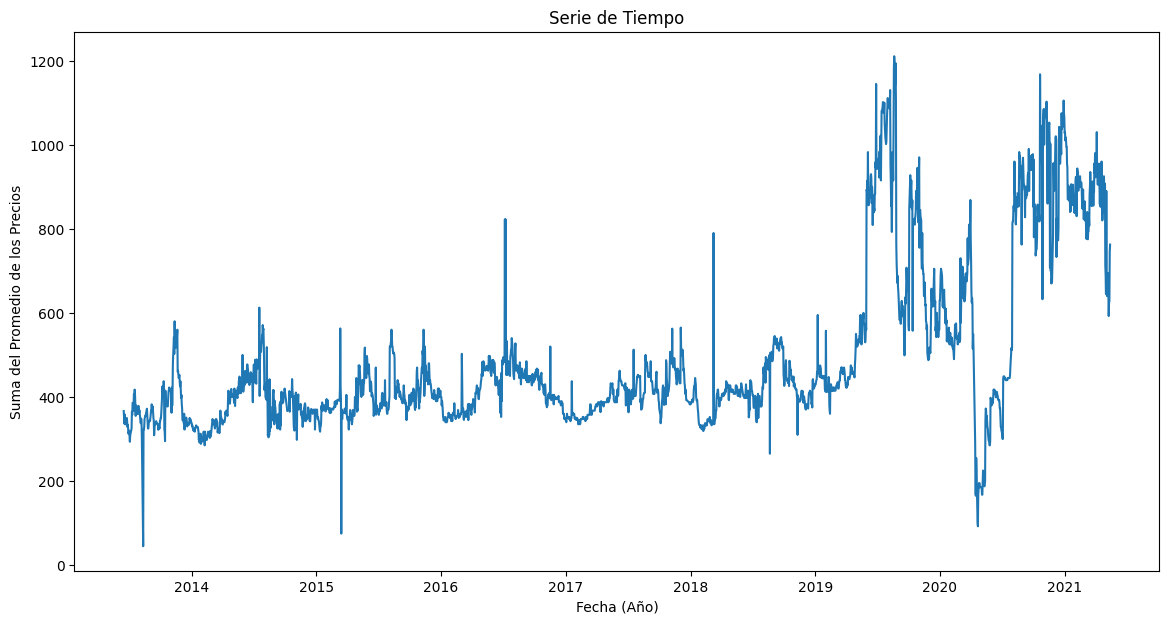

In [183]:
# Graficar serie de tiempo

plt.figure(figsize=(14, 7))
plt.plot(df_agrupado['Date'], df_agrupado['Average'])
plt.xlabel('Fecha (Año)')
plt.ylabel('Suma del Promedio de los Precios')
plt.title('Serie de Tiempo')
plt.show()

In [184]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# Link : https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# Ajustamos
series = df_agrupado.set_index('Date')['Average']
result = seasonal_decompose(series, model='additive', period = 365) #ver que onda el period
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: trend, Length: 2753, dtype: float64
Date
2013-06-16     0.885974
2013-06-17    43.154076
2013-06-18    67.151140
2013-06-19    73.518459
2013-06-20    83.650749
                ...    
2021-05-09   -87.152578
2021-05-10   -90.882323
2021-05-11   -92.902871
2021-05-12   -94.635748
2021-05-13   -94.404828
Name: seasonal, Length: 2753, dtype: float64
Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: resid, Length: 2753, dtype: float64
Date
2013-06-16    366.5
2013-06-17    350.0
2013-06-18    336.5
2013-06-19    358.5
2013-06-20    346.5
              ...  
2021-05-09    592.5
2021-05-10    625.0
2021-05-11    628.0
2021-05-12    745.0
2021-05-13   

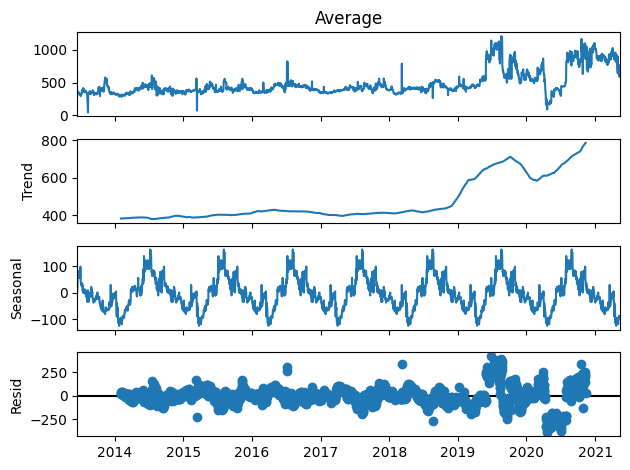

In [185]:
result.plot()
pyplot.show()

In [186]:
fecha_vieja = df['Date'].min()
fecha_nueva = df['Date'].max()
print('Fecha más antigua del df : ', fecha_vieja)
print('Fecha más nueva del df : ', fecha_nueva)

Fecha más antigua del df :  2013-06-16 00:00:00
Fecha más nueva del df :  2021-05-13 00:00:00


In [188]:
# Realizar Hold Out de 80/20

df_agrupado['set'] = np.where(df_agrupado['Date'] >= df_agrupado['Date'].quantile(0.8), 'test', 'train')

df_train = df_agrupado[df_agrupado['set'] == 'train'].copy()
df_test = df_agrupado[df_agrupado['set'] == 'test'].copy()

print(f'% destinado a train: {len(df_train) / len(df_agrupado):.2f}')
print(f'% destinado a test: {len(df_test) / len(df_agrupado):.2f}')

% destinado a train: 0.80
% destinado a test: 0.20


#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [164]:
#instalamos prophet
!pip install prophet

In [165]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**1. Generar dataframes de entrenamiento y testeo**

 Renombramos las columnas del dataframe original para poder aplicarlas bien en el modelo, el cual recibe los argumentos de 'ds' e 'y'
* ds : Date
* y : Average

In [191]:
df_train

,Date,Average,set
0,2013-06-16,366.5,train
1,2013-06-17,350.0,train
2,2013-06-18,336.5,train
3,2013-06-19,358.5,train
4,2013-06-20,346.5,train
...,...,...,...
2197,2019-10-26,902.5,train
2198,2019-10-27,945.0,train
2199,2019-10-28,885.0,train
2200,2019-10-29,945.0,train


In [198]:
# Respuesta
# Set de entrenamiento
df_new_train = df_train.drop("set", axis = 'columns')
df_new_train.columns = ['ds', 'y']
df_new_train.head(10)

,ds,y
0,2013-06-16,366.5
1,2013-06-17,350.0
2,2013-06-18,336.5
3,2013-06-19,358.5
4,2013-06-20,346.5
5,2013-06-21,335.0
6,2013-06-25,350.0
7,2013-06-26,342.5
8,2013-06-27,328.5
9,2013-06-28,333.5


In [209]:
df_new_test = df_test.drop("set", axis = 'columns')
df_new_test.columns = ['ds', 'y']
df_new_test.head(10)

,ds,y
2202,2019-10-31,925.0
2203,2019-11-01,970.0
2204,2019-11-02,755.0
2205,2019-11-03,842.5
2206,2019-11-04,845.0
2207,2019-11-05,830.0
2208,2019-11-06,825.0
2209,2019-11-07,820.0
2210,2019-11-08,735.0
2211,2019-11-09,705.0


**2. Modelo y entrenamiento**

In [210]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik4sv_dv/2_ui8saf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik4sv_dv/c6j84asd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47534', 'data', 'file=/tmp/tmpik4sv_dv/2_ui8saf.json', 'init=/tmp/tmpik4sv_dv/c6j84asd.json', 'output', 'file=/tmp/tmpik4sv_dv/prophet_model1kcieocy/prophet_model-20240524085137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [224]:
fecha_buscada = '2020-05-21'
resultado = df.loc[df['Date'] == fecha_buscada]

In [225]:
resultado

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
167180,167180,Tomato Big(Nepali),2020-05-21,Kg,25.0,30.0,27.5
167181,167181,Tomato Small(Tunnel),2020-05-21,Kg,30.0,35.0,32.5
167182,167182,Potato Red,2020-05-21,Kg,30.0,32.0,31.0
167183,167183,Potato White,2020-05-21,Kg,26.0,28.0,27.0
167184,167184,Onion Dry (Indian),2020-05-21,Kg,26.0,28.0,27.0
...,...,...,...,...,...,...,...
167239,167239,Capsicum,2020-05-21,Kg,40.0,45.0,42.5
167240,167240,Garlic Green,2020-05-21,Kg,80.0,90.0,85.0
167241,167241,Coriander Green,2020-05-21,Kg,45.0,50.0,47.5
167242,167242,Garlic Dry Chinese,2020-05-21,Kg,340.0,350.0,345.0


In [207]:
# Respuesta

future = model.make_future_dataframe(periods=365)
future.tail(10)

,ds
2557,2020-10-20
2558,2020-10-21
2559,2020-10-22
2560,2020-10-23
2561,2020-10-24
2562,2020-10-25
2563,2020-10-26
2564,2020-10-27
2565,2020-10-28
2566,2020-10-29


In [208]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2557,2020-10-20,1218.458496,1106.005932,1327.918286
2558,2020-10-21,1221.302412,1117.371129,1326.276475
2559,2020-10-22,1221.207209,1110.580035,1331.892957
2560,2020-10-23,1227.796335,1117.333097,1339.853387
2561,2020-10-24,1222.979850,1122.500432,1332.259771
2562,2020-10-25,1225.873833,1116.959984,1338.785764
2563,2020-10-26,1226.657506,1119.784656,1340.077024
2564,2020-10-27,1230.213492,1118.724878,1337.070328
2565,2020-10-28,1233.780245,1126.644146,1343.653331
2566,2020-10-29,1234.357609,1134.025787,1342.066467


In [222]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2202 non-null   datetime64[ns]
 1   y       2202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 116.1 KB


In [220]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2567 non-null   datetime64[ns]
 1   trend                       2567 non-null   float64       
 2   yhat_lower                  2567 non-null   float64       
 3   yhat_upper                  2567 non-null   float64       
 4   trend_lower                 2567 non-null   float64       
 5   trend_upper                 2567 non-null   float64       
 6   additive_terms              2567 non-null   float64       
 7   additive_terms_lower        2567 non-null   float64       
 8   additive_terms_upper        2567 non-null   float64       
 9   weekly                      2567 non-null   float64       
 10  weekly_lower                2567 non-null   float64       
 11  weekly_upper                2567 non-null   float64     

* ds: Esta columna representa las fechas para las cuales se están realizando las predicciones. En el contexto de tu problema, estas fechas serán futuras a partir del último punto en tu conjunto de datos de entrenamiento. Por ejemplo, si tienes datos hasta el 13 de mayo de 2021 y estás prediciendo 365 días adicionales, las fechas en la columna ds corresponderán a los días posteriores al 13 de mayo de 2021.

* yhat: Esta columna contiene las predicciones del valor objetivo (en tu caso, el precio promedio de frutas y vegetales) realizadas por el modelo Prophet. Estas predicciones son las estimaciones centrales o el valor esperado de la variable objetivo para cada fecha en la columna ds.

* yhat_lower: Esta columna representa los límites inferiores de los intervalos de confianza para las predicciones realizadas por el modelo. En otras palabras, para cada fecha en la columna ds, yhat_lower proporciona una estimación del valor mínimo que se espera para el precio promedio de frutas y vegetales con cierto nivel de confianza.

* yhat_upper: Similar a yhat_lower, esta columna contiene los límites superiores de los intervalos de confianza para las predicciones del modelo. Para cada fecha en la columna ds, yhat_upper proporciona una estimación del valor máximo esperado para el precio promedio de frutas y vegetales con cierto nivel de confianza.

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

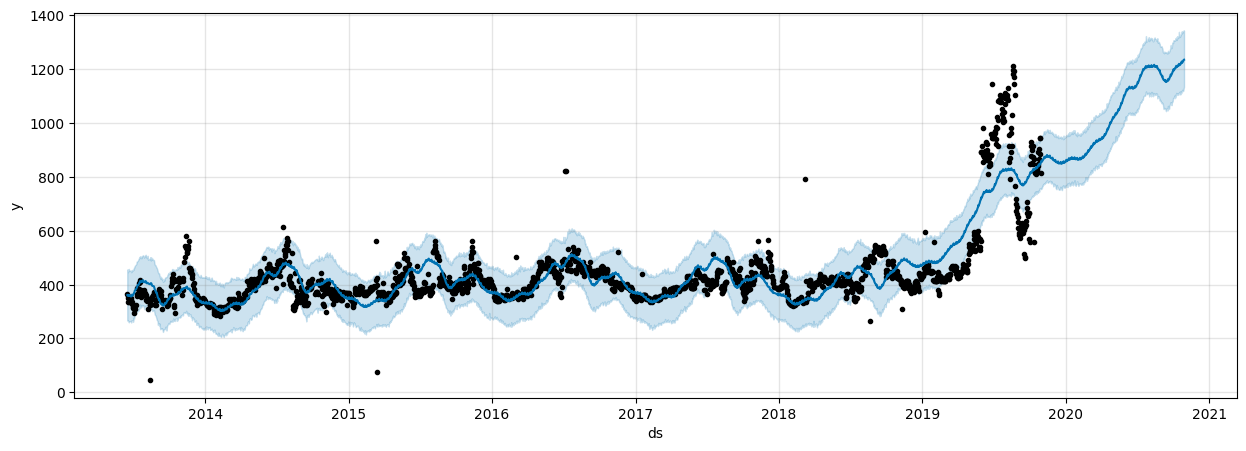

In [216]:
# plot forecast, estático.
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

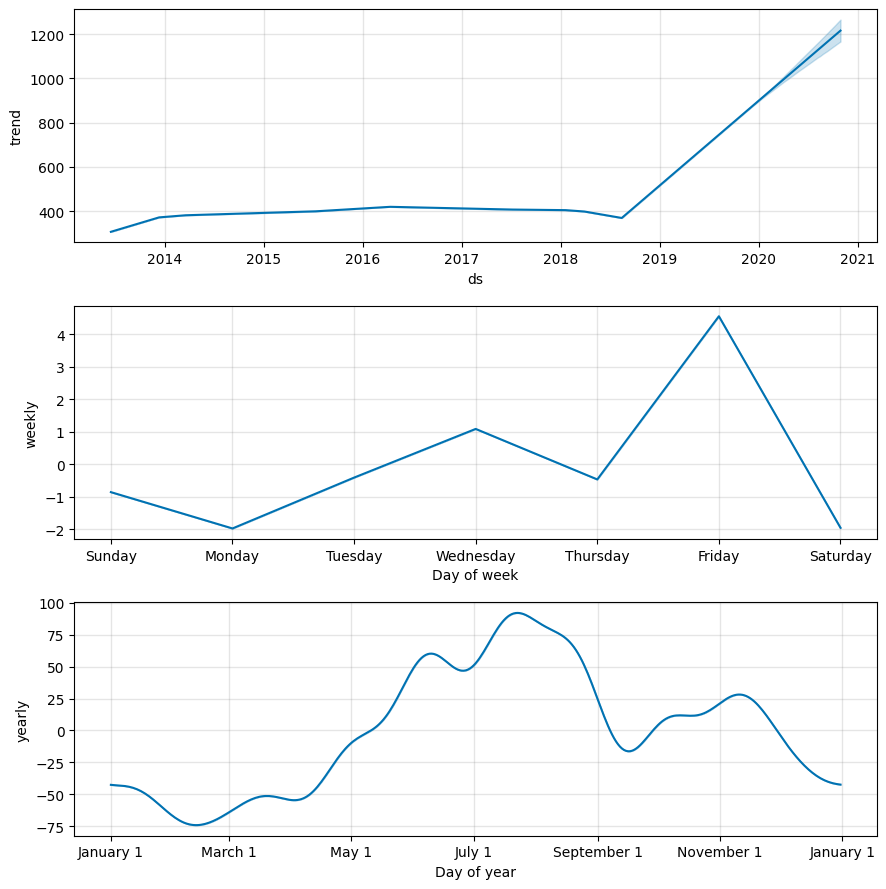

In [217]:
# descomposición por componentes, estático
fig = model.plot_components(forecast)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [ ]:
# Respuesta

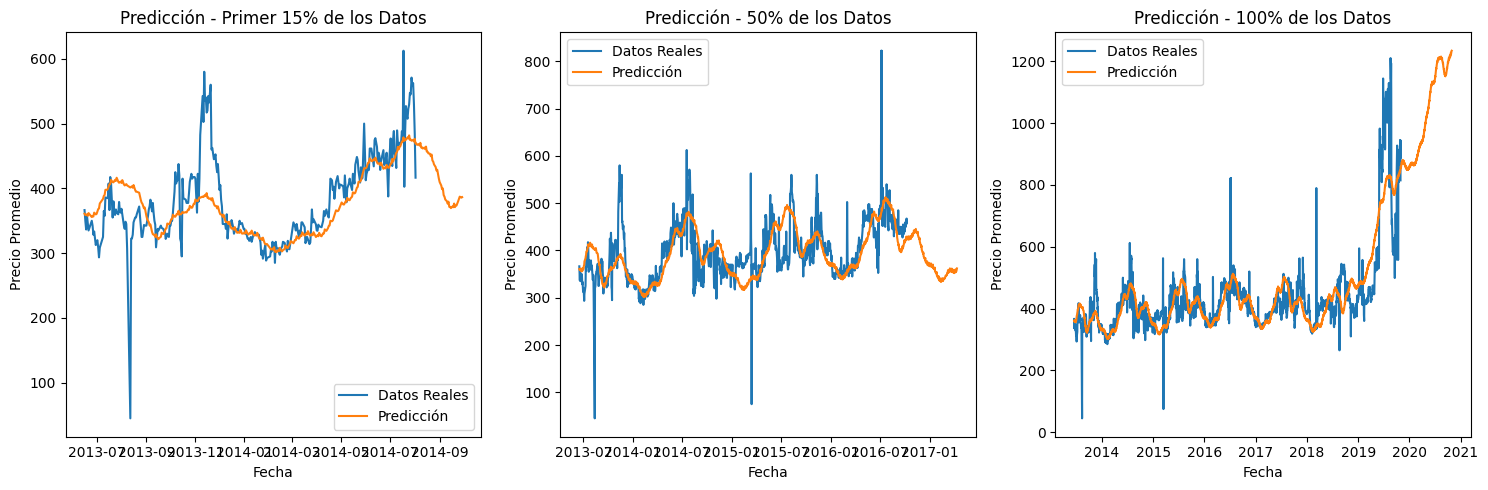

In [226]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Crear Gráfica de Predicción con Datos Reales
plt.figure(figsize=(15, 5))

# Vista del primer 15% de los datos
plt.subplot(1, 3, 1)
plt.plot(df_new_train['ds'][:int(len(df_new_train)*0.15)], df_new_train['y'][:int(len(df_new_train)*0.15)], label='Datos Reales')
plt.plot(forecast['ds'][:int(len(forecast)*0.15)], forecast['yhat'][:int(len(forecast)*0.15)], label='Predicción')
plt.title('Predicción - Primer 15% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

# Vista del 50% de los datos
plt.subplot(1, 3, 2)
plt.plot(df_new_train['ds'][:int(len(df_new_train)*0.5)], df_new_train['y'][:int(len(df_new_train)*0.5)], label='Datos Reales')
plt.plot(forecast['ds'][:int(len(forecast)*0.5)], forecast['yhat'][:int(len(forecast)*0.5)], label='Predicción')
plt.title('Predicción - 50% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

# Vista del 100% de la predicción
plt.subplot(1, 3, 3)
plt.plot(df_new_train['ds'], df_new_train['y'], label='Datos Reales')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción')
plt.title('Predicción - 100% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Calcular Métricas de Error
y_true = df_new_train['y']
y_pred = forecast['yhat']

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Métricas de Error:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Truncar las predicciones para que tengan la misma longitud que los datos reales
y_pred_truncado = y_pred[:len(y_true)]

# Calcular las métricas de error con los datos truncados
rmse = mean_squared_error(y_true, y_pred_truncado, squared=False)
mae = mean_absolute_error(y_true, y_pred_truncado)
mape = np.mean(np.abs((y_true - y_pred_truncado) / y_true)) * 100

print("Métricas de Error:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


Métricas de Error:
RMSE: 73.10024201189812
MAE: 49.07908015423158
MAPE: 10.770229171800706


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [218]:
# Respuesta
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='Chile')
m.fit(df)


NameError: name 'holidays' is not defined

**2. Predecir**

In [ ]:
# Respuesta

**3. Resultados**

In [ ]:
# Respuesta

#plot de componentes

#plot de predicción

#resultados

¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [ ]:
# Respuesta

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [ ]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162995 sha256=7f096d46a15cbf79732cc92fb0ca2f0401649c80906e96bddfe4e66ddd4ef445
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [ ]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [ ]:
# Respuesta

Verificar que no hayan valores nulos

In [ ]:
# Respuesta

Graficar distribución de los ratings

In [ ]:
# Respuesta

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [ ]:
# Respuesta

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1.
2.
3.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [ ]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [ ]:
from surprise.model_selection import train_test_split

# Respuesta

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [ ]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta

In [ ]:
# Evaluar con MAE

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [ ]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings =

  # Ordenar las predicciones
  sorted_predicted_ratings =

  return sorted_predicted_ratings[:k]

In [ ]:
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model =

# entrenar

#predecir en dataframe de testeo

predictions =  # retornar un dataframe con el rating estimado para cada (user_id, item_id)

# obtener mse


Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122
[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[(2679, 5),
 (1326, 4.799755049750801),
 (4650, 4.399861310283875),
 (1692, 4.333333333333333),
 (4363, 4.199459547276517)]

In [ ]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

In [ ]:
# entrenar algoritmo base a items, obtener MSE

sim_options =

# algoritmo base a items.

item_model =

# entrenar

#predecir en dataframe de testeo

predictions =

# obtener mse

In [ ]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [ ]:
# Respuesta

model =

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)

predictions =

In [ ]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.